In [11]:
# %load /home/glebi/git/experiment-automation/processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})


In [25]:
dataframes = []
for i in range(1, 4):
    dataframes.append(pd.read_csv(f"data_setup_{i}.csv", sep="\t"))
x_name, y_name = dataframes[0].columns

background = pd.read_csv("background_radiation.csv", sep="\t")

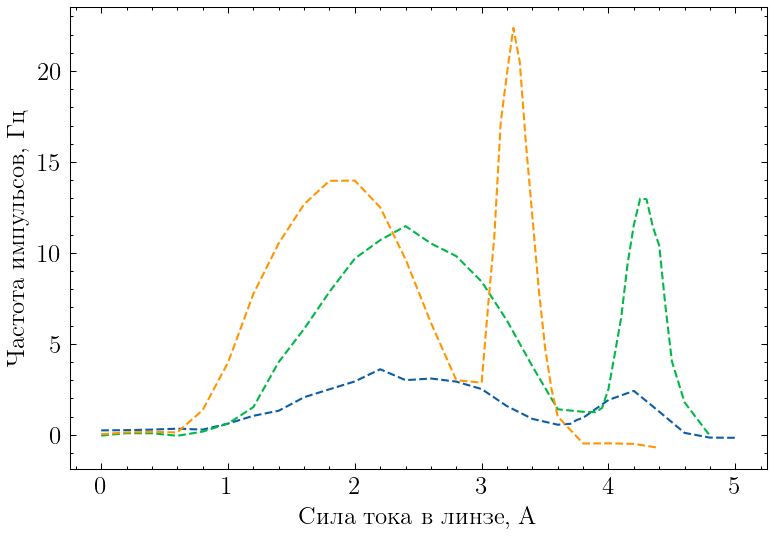

In [51]:
for df, bg in zip(dataframes, background.iterrows()):
    level, dev = bg[1]
    I = df[x_name]
    nu = df[y_name] - level
    
    plt.plot(I, nu, "--")

plt.xlabel("Ток через линзу, А")
plt.ylabel(y_name)
    
plt.savefig("all_setups-NU_on_I.png")
plt.show()

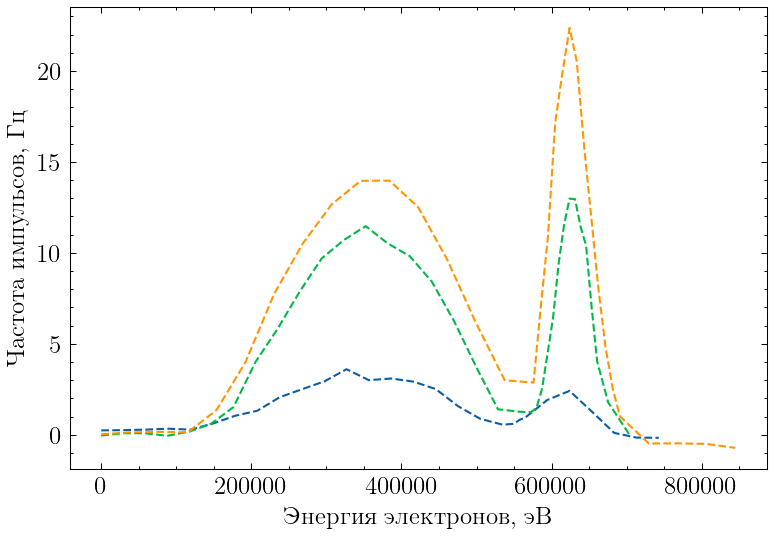

In [66]:
T_k = 0.624e6 # энергия электронов внутрненней конверсии, эВ

for df, bg in zip(dataframes, background.iterrows()):
    level, dev = bg[1]
    I = df[x_name]
    nu = df[y_name] - level
    
    idxmax = nu[16:].idxmax()
    k = T_k / I[idxmax]
    
    plt.plot(I*k, nu, "--")
    # plt.plot(I[idxmax]*k, nu[idxmax], "x")

plt.xlabel("Энергия электронов, эВ")
plt.ylabel(y_name)
    
plt.savefig("all_setups-NU_on_EV.png")
plt.show()

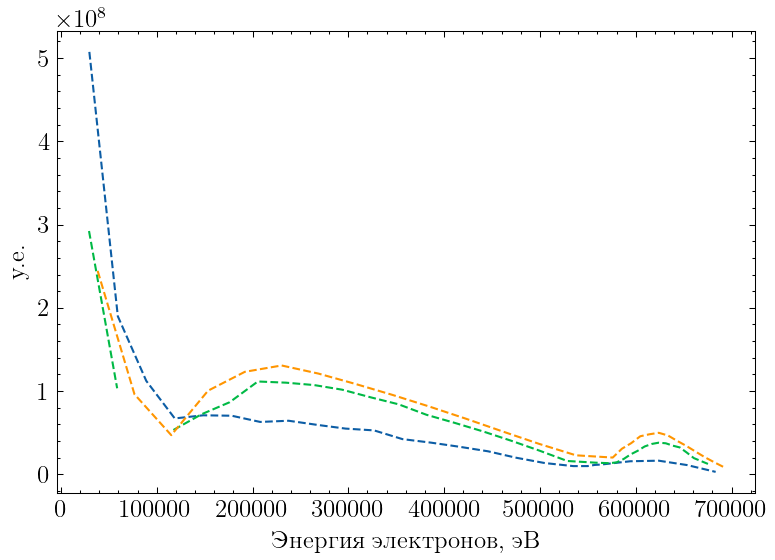

In [67]:
for df, bg in zip(dataframes, background.iterrows()):
    level, dev = bg[1]
    I = df[x_name]
    nu = df[y_name] - level
    
    idxmax = nu[16:].idxmax()
    k = T_k / I[idxmax]
    T = I*k
    p = T / 3e10
    
    plt.plot(T, nu**0.5 / p**(3/2), "--")
    # plt.plot(I[idxmax]*k, nu[idxmax], "x")

plt.xlabel("Энергия электронов, эВ")
plt.ylabel("у.е.")
    
plt.savefig("all_setups-NU_on_EV.png")
plt.show()